# import libraries and analyze the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
base_data = pd.read_csv('data_credit_default.csv', sep=';',decimal=',', parse_dates=['п43'], encoding='cp1251')

In [3]:
base_data['п43'] = pd.to_datetime(base_data['п43'], format='mixed').dt.date

In [4]:
base_data.head()

,def,ID pers,ID,ID loan,п1,п2,п3,п4,п5,п6,...,п59,п60,п61,п62,п63,п64,п65,п66,п67,Unnamed: 71
0,0,173359,53.040121.002,53-050121-1-1,Престиж,Нет,Нет,24.9,5500,5500,...,Нет,Нет,NaN,Да,Да,5500,Нет,Да,9.0,NaN
1,0,0972QL,55.040121.001,55-040121-1-1,Классик,Нет,Да,24.9,3100,3100,...,Нет,Нет,NaN,Да,Да,3100,Нет,Да,11.0,NaN
2,0,496068,84.040121.001,84-040121-1-1,Престиж,Нет,NaN,24.9,1500,1200,...,Нет,Нет,NaN,Да,Да,1200,Нет,Да,19.0,NaN
3,0,091AVO,01.050121.001,50-110121-1-1,Престиж,Да,Нет,24.9,9000,9000,...,Нет,Нет,Да,Да,Да,9000,Нет,Да,65.0,NaN
4,0,0973AK,54.050121.002,54-050121-1-1,Классик,Нет,Да,24.9,3000,2800,...,Нет,Нет,NaN,Да,Да,2800,Нет,Да,177.0,NaN


In [5]:
nan_features = pd.Series(base_data.isnull().sum())
nan_features[nan_features>0]

ID pers            2
ID loan           10
п3                 3
п11                2
п12                1
п20               77
п23              145
п34              709
п37               16
п44            10442
п45             1359
п46             6247
п47                7
п48                7
п49                2
п50                2
п52            10344
п61             5782
п67              978
Unnamed: 71    10442
dtype: int64

In [6]:
# remove features with more than 90% empty values
data_drop_nan = base_data.drop(['п44','п52','Unnamed: 71'],axis=1)

In [7]:
data_drop_nan.describe().T

,count,mean,std,min,25%,50%,75%,max
def,10442.0,0.059088,0.235801,0.00,0.0000,0.000,0.0000,1.00
п4,10442.0,24.330341,3.621162,18.40,22.0000,24.900,24.9000,34.80
п5,10442.0,8343.541371,10754.367884,500.00,2626.2500,5000.000,10000.0000,100000.00
п6,10442.0,7013.272074,8744.376400,500.00,2300.0000,4700.000,8300.0000,100000.00
п7,10442.0,47.582455,14.203076,2.00,36.0000,60.000,60.0000,60.00
п8,10442.0,47.572496,14.212447,2.00,36.0000,60.000,60.0000,60.00
п9,10442.0,40.210305,10.715448,21.00,32.0000,39.000,48.0000,67.00
п10,10442.0,1.394082,0.488676,1.00,1.0000,1.000,2.0000,2.00
п13,10442.0,1.129860,0.372391,1.00,1.0000,1.000,1.0000,3.00
п16,10442.0,8.371289,10.850154,0.00,0.0000,3.000,14.0000,47.00


In [8]:
cat_features = data_drop_nan.select_dtypes(include='object')
for i in cat_features:
    print(end='\n')
    print(data_drop_nan[i].value_counts())


ID pers
453555    7
099XZ6    6
313346    6
099DO9    6
496953    5
         ..
102AF4    1
157468    1
1019Y8    1
10196O    1
208972    1
Name: count, Length: 9414, dtype: int64

ID
53.040121.002    1
78.090822.004    1
75.090822.002    1
78.090822.001    1
68.090822.002    1
                ..
67.240921.001    1
68.240921.001    1
74.240921.001    1
78.240921.001    1
71.301222.002    1
Name: count, Length: 10442, dtype: int64

ID loan
53-050121-1-1    1
92-090822-1-1    1
69-100822-1-1    1
69-090822-1-1    1
75-090822-1-2    1
                ..
53-240921-1-2    1
53-240921-1-7    1
58-240921-1-1    1
65-240921-1-1    1
71-301222-1-2    1
Name: count, Length: 10432, dtype: int64

п1
Потенциальный клиент    3374
Массовый сегмент        2961
Классик                 2263
Престиж                 1483
VIP                      183
Премиум                  178
Name: count, dtype: int64

п2
Нет    7835
Да     2607
Name: count, dtype: int64

п3
Нет    10307
Да       132
Name: count, dtype

In [9]:
# remove irrelavant features
data_drop_no_info_feat = data_drop_nan.drop(['ID pers','ID','ID loan','п26','п43','п47','п49','п54','п56'], axis=1)

In [10]:
# transform some categorical features (Yes/No) into binary
bool_features = ['п2','п3','п24','п25','п41','п48','п50','п55','п57','п58','п59','п60','п62','п63','п65','п66','п61']
for g in bool_features:
    data_drop_no_info_feat[g] = data_drop_no_info_feat[g].map({'Да': 1,'Нет': 0})

In [11]:
cat_null = pd.Series(data_drop_no_info_feat.select_dtypes(include='object').isnull().sum())
cat_null[cat_null>0]

п11       2
п12       1
п20      77
п23     145
п37      16
п45    1359
dtype: int64

In [12]:
num_null = pd.Series(data_drop_no_info_feat.select_dtypes(exclude='object').isnull().sum())
num_null[num_null>0]

п3        3
п34     709
п46    6247
п48       7
п50       2
п61    5782
п67     978
dtype: int64

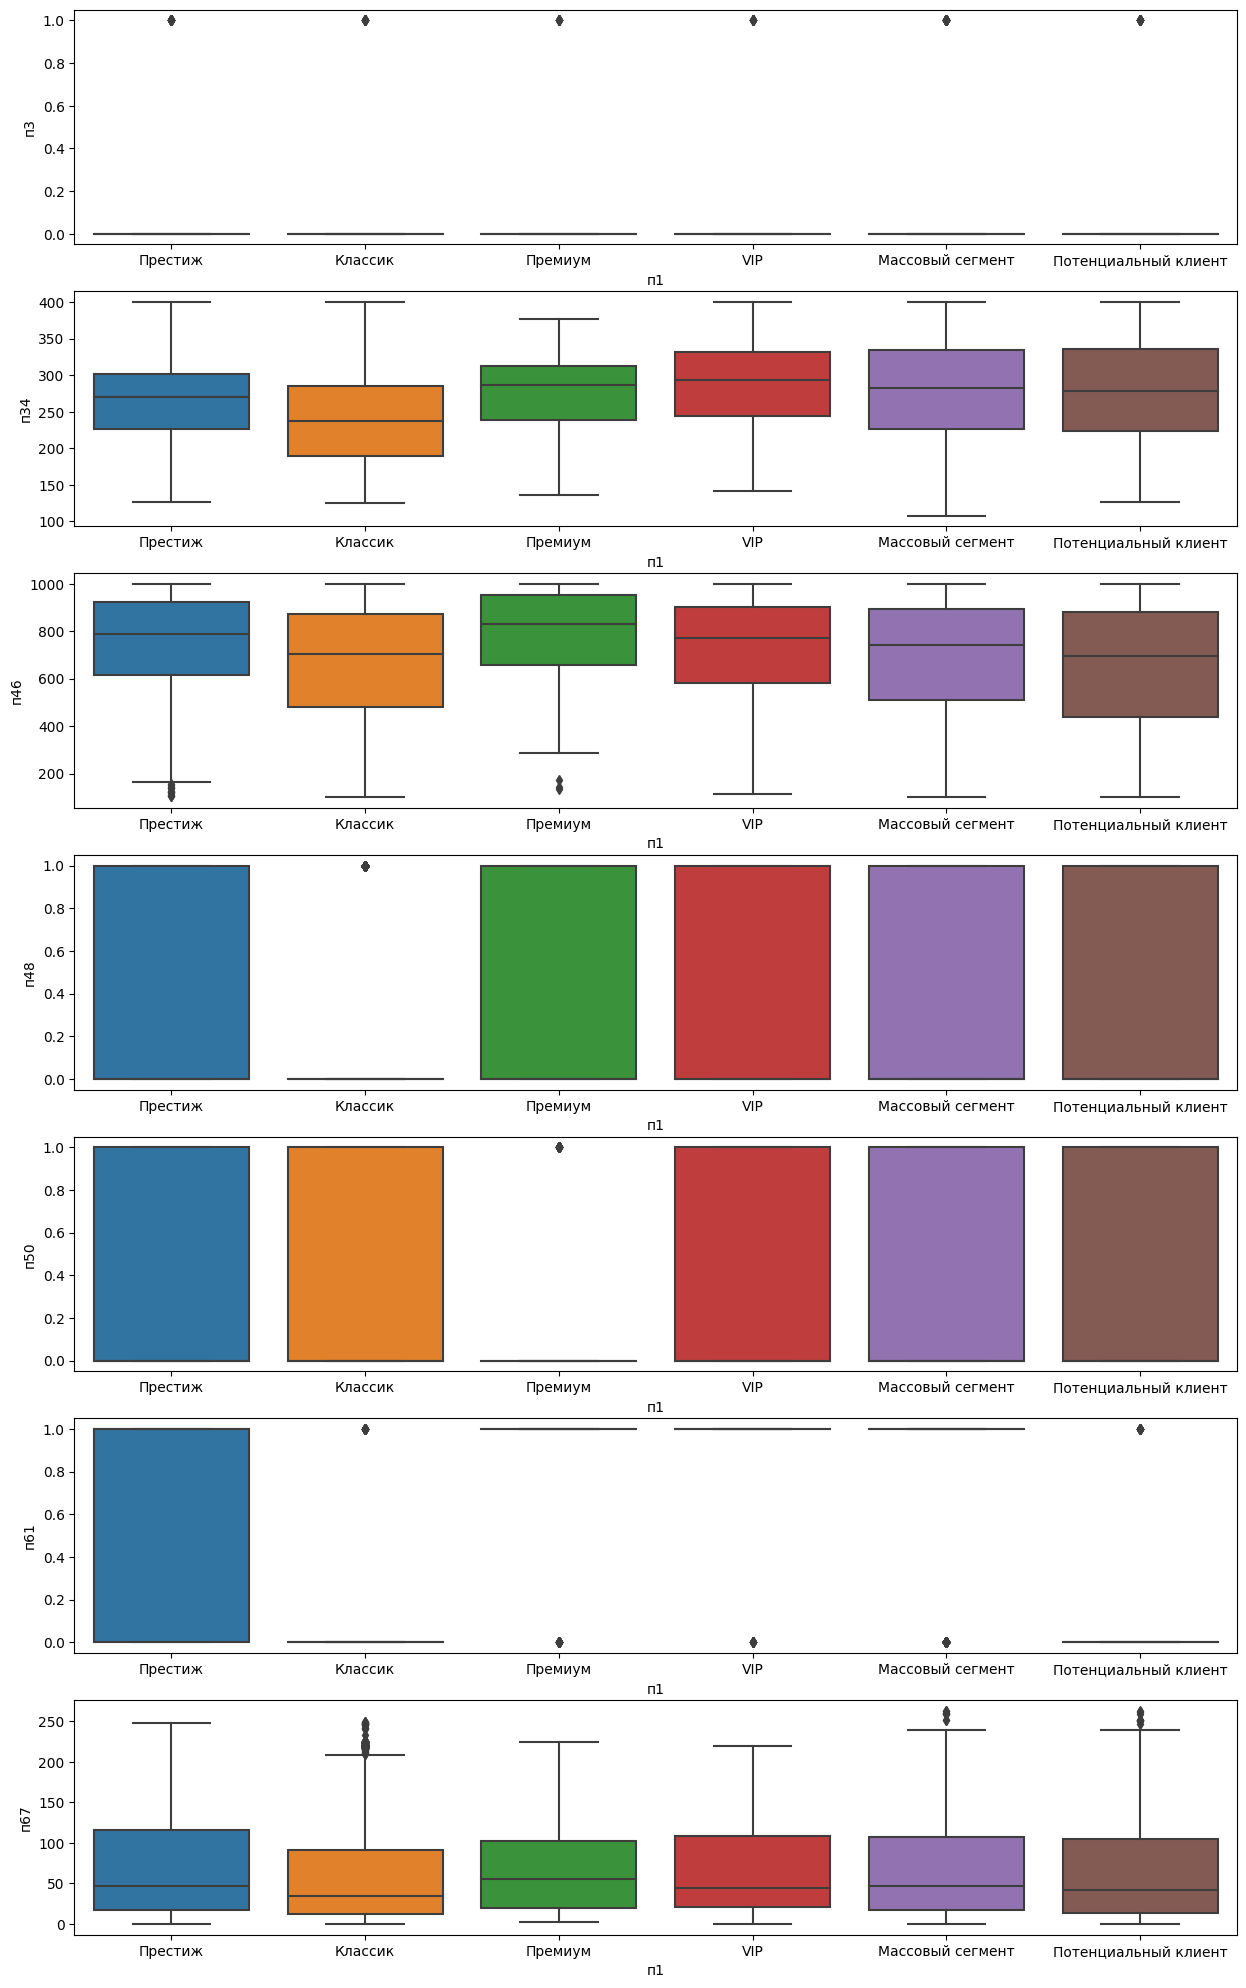

In [13]:
# boxplots by customer segments
num_null_features = ['п3','п34','п46','п48','п50','п61','п67']
f, axes = plt.subplots(len(num_null_features),figsize=(15, 25))
for idx, feature in enumerate(num_null_features):
    sns.boxplot(data_drop_no_info_feat, y=feature, x='п1', ax=axes[idx])
plt.show()

# processing empty values

In [14]:
# fill median value by customer segments (п1) for numerical features: п34, п46, п61, п67
lst_num = ['п34','п46','п61','п67']
data_without_null = data_drop_no_info_feat.copy()
for i in lst_num:
    median_values = data_without_null.groupby('п1')[i].median()
    for g in median_values.index:
        data_without_null[i]= np.where((data_without_null[i].isnull()) & (data_without_null['п1'] == g)
                                       , median_values.loc[g], data_without_null[i])

In [15]:
# fill zero for other numerical features (п3, п48, п50) and not_info for categorical features
fill_null = {'п11': 'not_info', 'п12': 'not_info', 'п20': 'not_info', 'п23': 'not_info', 'п37': 'not_info'
             , 'п45': 'not_info', 'п3': 0, 'п48': 0, 'п50': 0}
data_without_null = data_without_null.fillna(fill_null)

In [16]:
data_without_null.isnull().sum()

def    0
п1     0
п2     0
п3     0
п4     0
п5     0
п6     0
п7     0
п8     0
п9     0
п10    0
п11    0
п12    0
п13    0
п14    0
п15    0
п16    0
п17    0
п18    0
п19    0
п20    0
п21    0
п22    0
п23    0
п24    0
п25    0
п27    0
п28    0
п29    0
п30    0
п31    0
п32    0
п33    0
п34    0
п35    0
п36    0
п37    0
п38    0
п39    0
п40    0
п41    0
п42    0
п45    0
п46    0
п48    0
п50    0
п51    0
п53    0
п55    0
п57    0
п58    0
п59    0
п60    0
п61    0
п62    0
п63    0
п64    0
п65    0
п66    0
п67    0
dtype: int64

# Correlation Heatmap

In [17]:
num_features = data_without_null.select_dtypes(include=['int64','float64'])
corr_num = num_features.corr().iloc[1:,0].sort_values(ascending=False)

<Axes: >

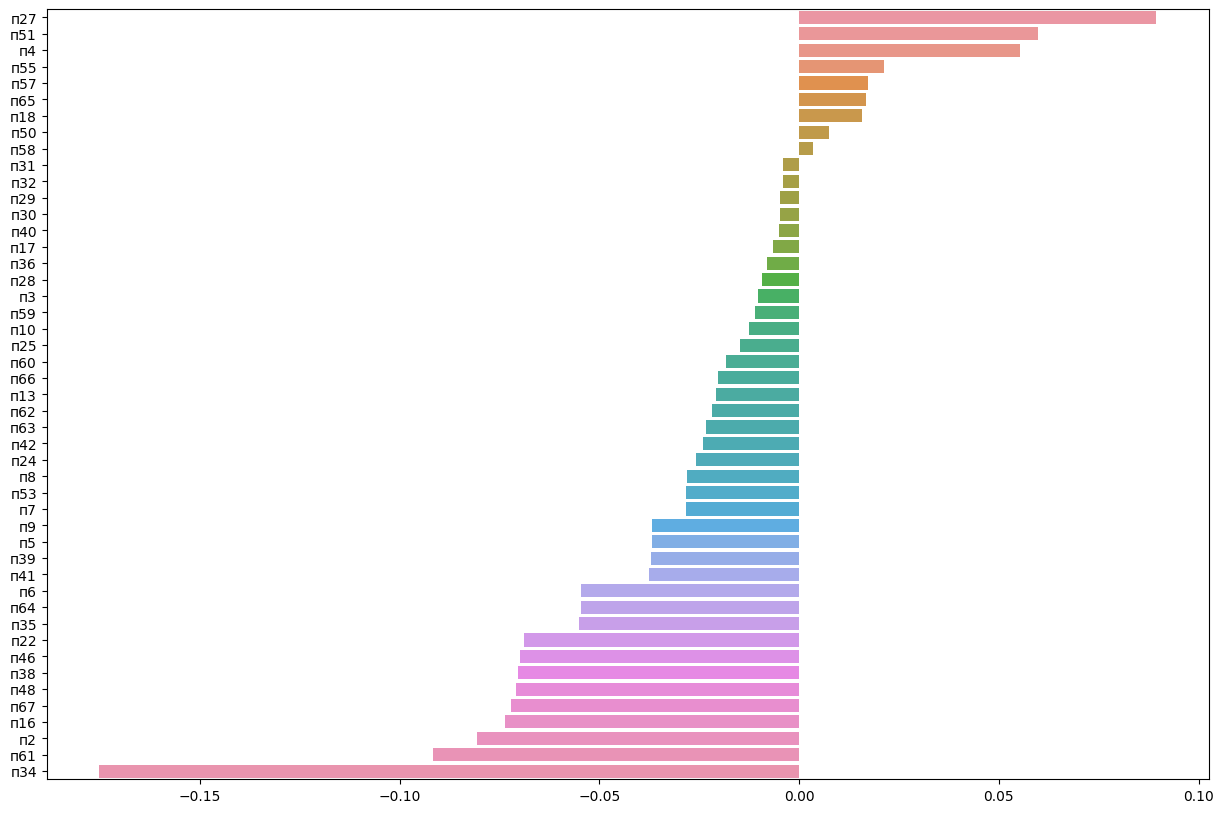

In [18]:
# correlation of features with the target variable
plt.subplots(figsize=(15, 10))
sns.barplot(x=corr_num.values, y=corr_num.index)

<Axes: >

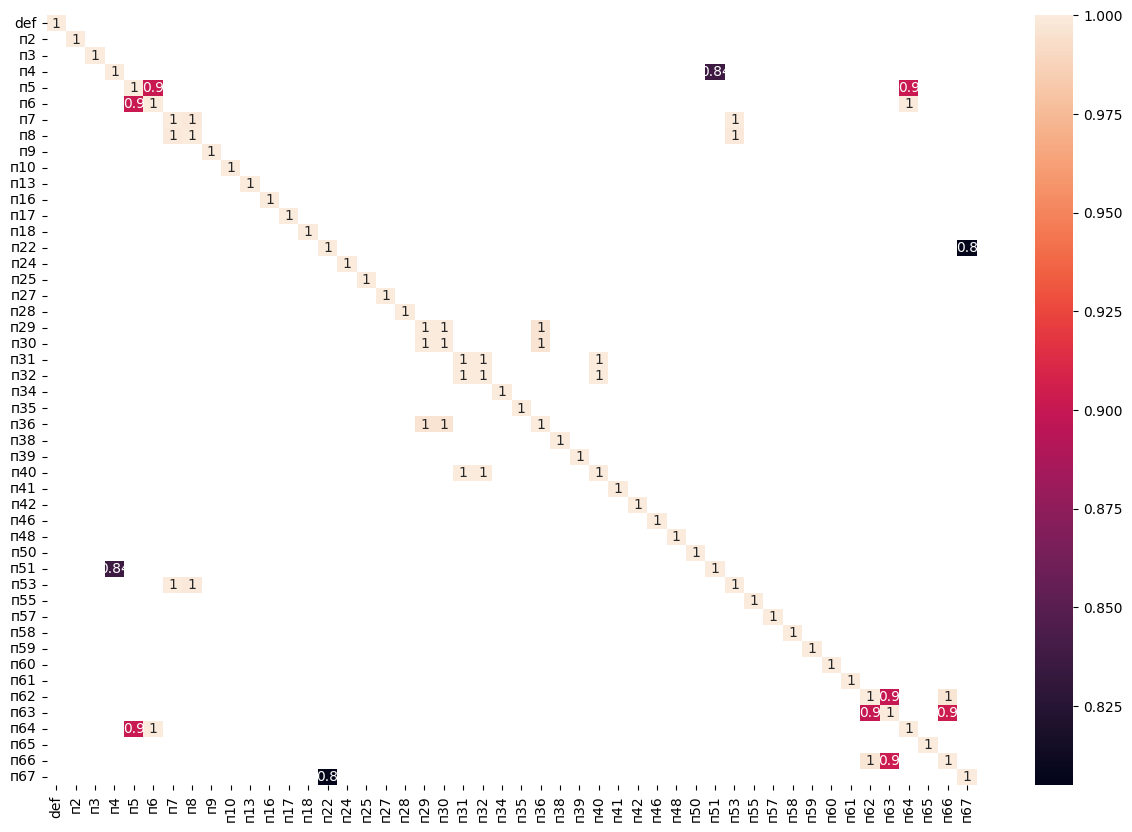

In [19]:
# correlation of features is more than 0.7
plt.subplots(figsize=(15, 10))
sns.heatmap(num_features.corr()[num_features.corr()>0.7], annot=True)

In [20]:
num_features = num_features.drop(['п4','п5','п6','п7','п8','п29','п30','п31','п32','п62','п66','п67'], axis=1)

<Axes: >

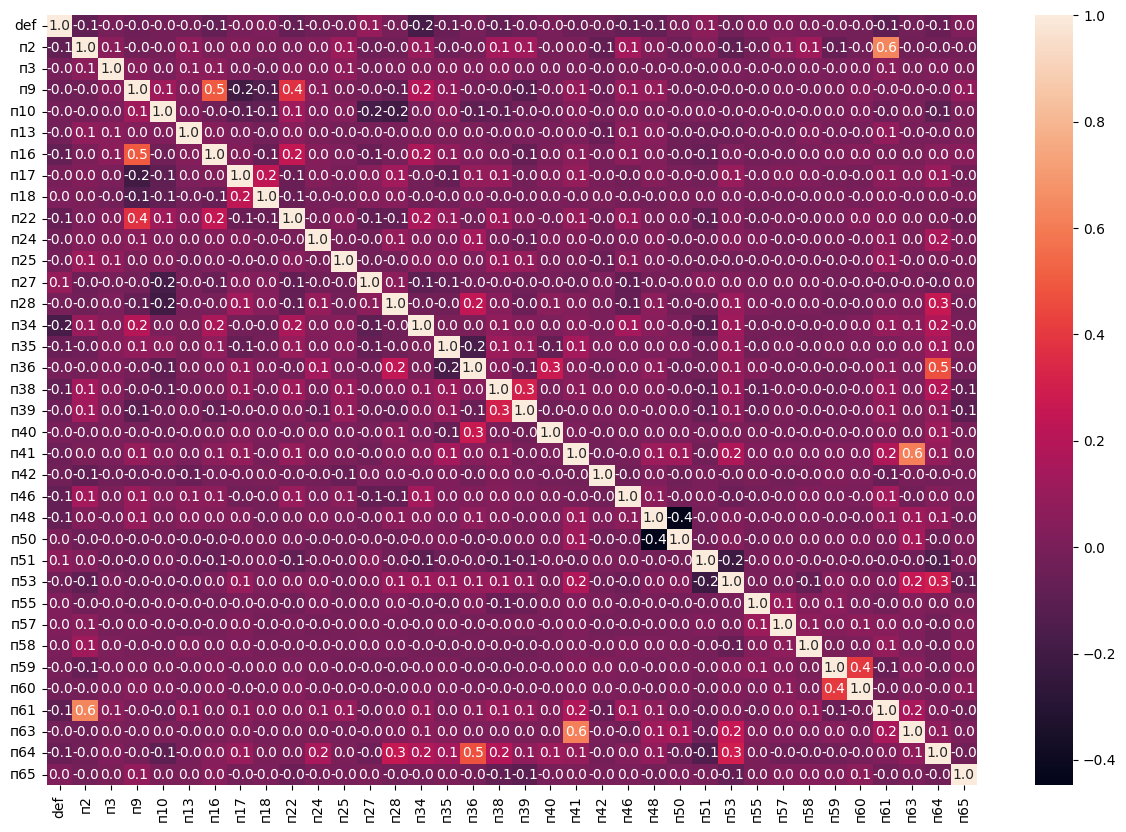

In [21]:
# correlation of features after drop some features with correlation more than 0.7
corr_num = num_features.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(corr_num, fmt='.1f', annot=True)

In [22]:
# apply to dataset and remove some collinear features
data_without_corr = data_without_null.drop(['п4','п5','п6','п7','п8','п29','п30','п31','п32','п62','п66','п67'], axis=1)

In [23]:
data_without_corr.columns

Index(['def', 'п1', 'п2', 'п3', 'п9', 'п10', 'п11', 'п12', 'п13', 'п14', 'п15',
       'п16', 'п17', 'п18', 'п19', 'п20', 'п21', 'п22', 'п23', 'п24', 'п25',
       'п27', 'п28', 'п33', 'п34', 'п35', 'п36', 'п37', 'п38', 'п39', 'п40',
       'п41', 'п42', 'п45', 'п46', 'п48', 'п50', 'п51', 'п53', 'п55', 'п57',
       'п58', 'п59', 'п60', 'п61', 'п63', 'п64', 'п65'],
      dtype='object')

# processing extreme values

In [24]:
bool_feat = ['п2','п3','п24','п25','п41','п48','п50','п55','п57','п58','п59','п60','п61','п63','п65']

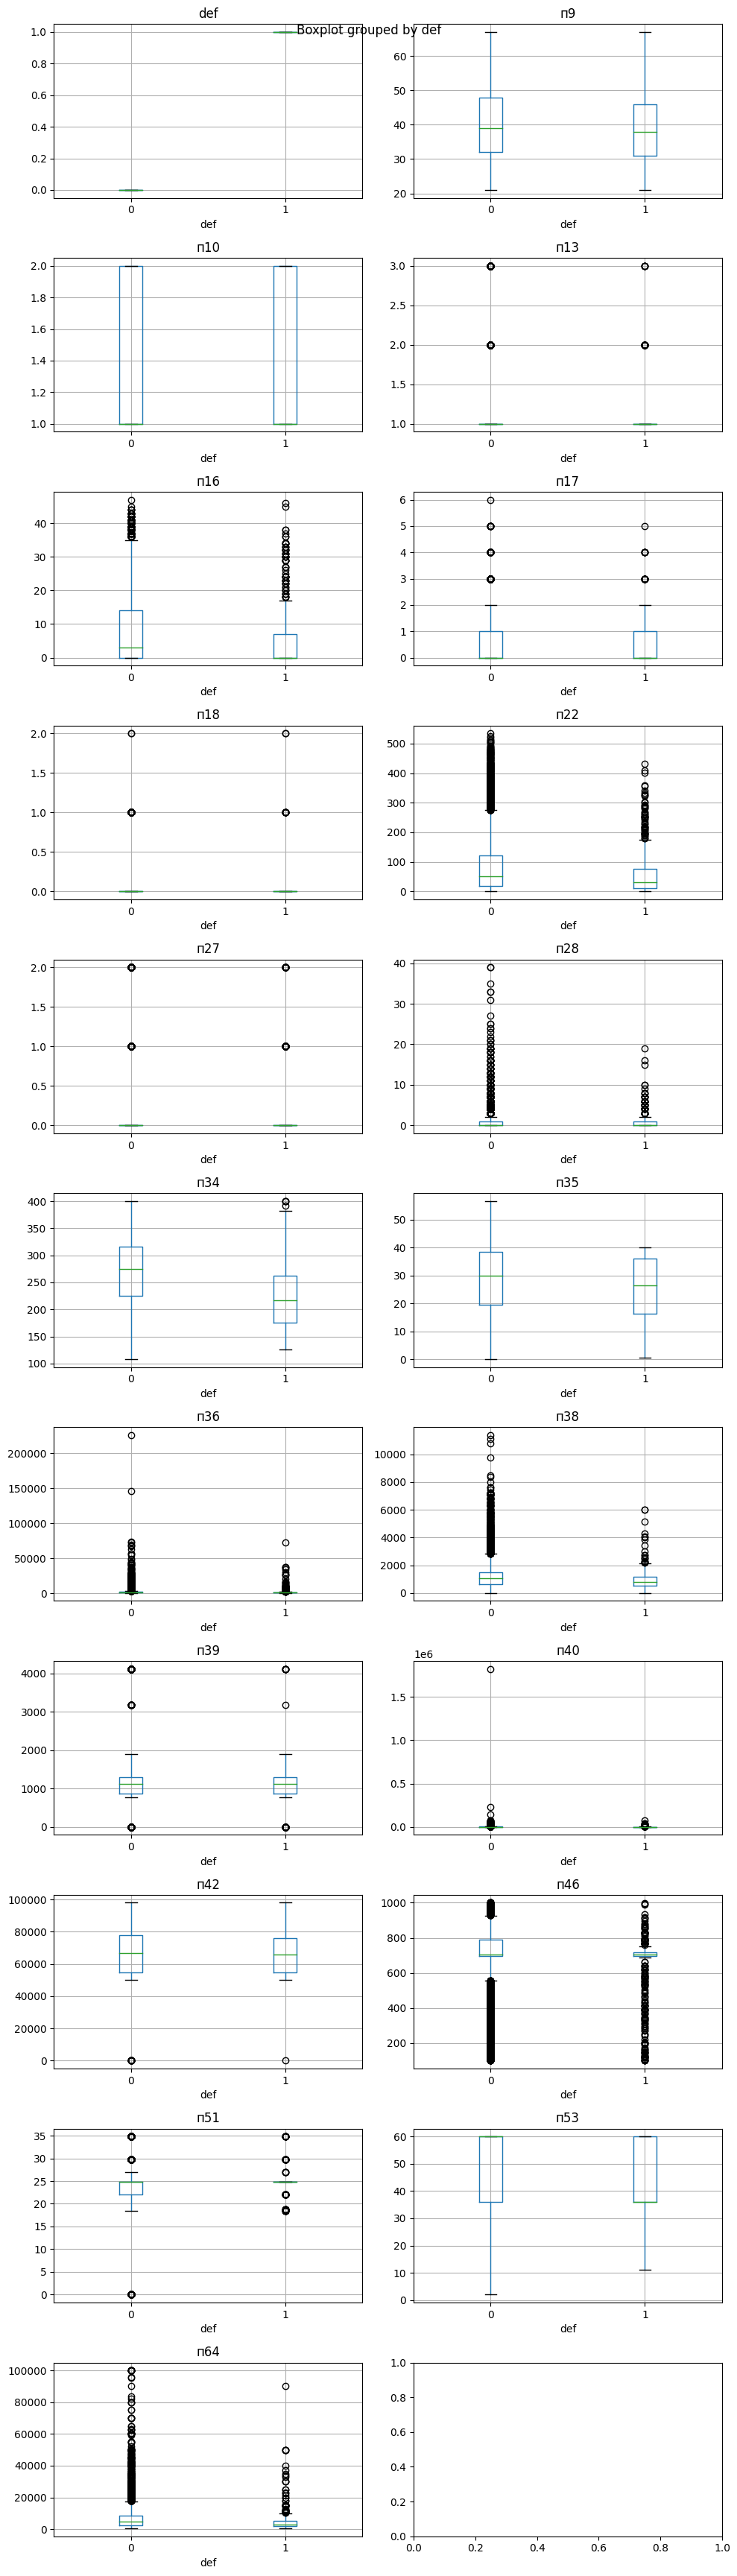

In [25]:
numerical = data_without_corr.select_dtypes(include=['int64','float64']).drop(bool_feat, axis=1).columns
cols = 2
rows = 11
fig, ax = plt.subplots(rows, cols, figsize=(10, 35))
for idx, feature in enumerate(numerical):
    col = idx%cols
    row = idx//cols
    data_without_corr.boxplot(column=feature, by='def', ax=ax[row][col])
plt.tight_layout()

In [26]:
drop_feat = bool_feat + ['п13','п18','п27','def']
num_features = data_without_corr.select_dtypes(include=['int64','float64']).drop(drop_feat, axis=1).columns
for i in num_features:
    IQR = data_without_corr[i].quantile(0.75)-data_without_corr[i].quantile(0.25)
    upper = data_without_corr[i].quantile(0.75) + 1.5*IQR
    lower = data_without_corr[i].quantile(0.25) - 1.5*IQR
    data_without_corr[i] = np.where(data_without_corr[i]>=upper, upper, data_without_corr[i])
    data_without_corr[i] = np.where(data_without_corr[i]<=lower, lower, data_without_corr[i])

# feature selection

In [27]:
from optbinning import OptimalBinning
binning_array_columns = data_without_corr.columns
category_columns = data_without_corr.select_dtypes(include='object').columns
all_binning_array = []
for i in binning_array_columns:
    x = data_without_corr[i].values
    y = data_without_corr['def'].to_numpy()
    if i in category_columns:
        optb = OptimalBinning(name=i, dtype='categorical', solver='cp')
        optb.fit(x,y)
    else:
        optb = OptimalBinning(name=i, solver='cp')
        optb.fit(x,y)
    all_binning_array.append(optb) 

(CVXPY) Jan 06 09:13:36 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 06 09:13:36 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [28]:
z = 0
for i in range(len(all_binning_array)):
    print(binning_array_columns[z], end='\n')
    print(all_binning_array[i].binning_table.build())
    print(end='\n')
    z+=1

def
                Bin  Count  Count (%)  Non-event  Event  Event rate  WoE   IV  \
0       (-inf, inf)  10442        1.0       9825    617    0.059088  0.0  0.0   
1           Special      0        0.0          0      0    0.000000  0.0  0.0   
2           Missing      0        0.0          0      0    0.000000  0.0  0.0   
Totals               10442        1.0       9825    617    0.059088       0.0   

         JS  
0       0.0  
1       0.0  
2       0.0  
Totals  0.0  

п1
                                Bin  Count  Count (%)  Non-event  Event  \
0       [Премиум, Массовый сегмент]   3139   0.300613       3039    100   
1                         [Престиж]   1483   0.142023       1429     54   
2       [VIP, Потенциальный клиент]   3557   0.340644       3353    204   
3                         [Классик]   2263   0.216721       2004    259   
4                           Special      0   0.000000          0      0   
5                           Missing      0   0.000000          0  

In [29]:
# remove uninformative or low informative features (IV < 0.05)
final_data = data_without_corr.drop(['п3','п10','п11','п12','п13','п17','п18','п20','п24','п25','п28','п33'
                                     ,'п41','п50','п53','п55','п57','п58','п59','п60','п63','п65'], axis=1)

# processing categorical variables

In [30]:
# binning
def p1_bins(x):
    if x in ['Премиум','Массовый сегмент']:
        return 'Премиум, Массовый сегмент'
    elif x in ['VIP','Потенциальный клиент']:
        return 'VIP, Потенциальный клиент'
    else: return x
    
def p12_bins(x):
    if x in ['not_info', 'пр', 'от', 'вс', 'во', 'за']:
        return 'пр, от, вс, во, за'
    elif x in ['ос', 'но']:
        return 'ос, но'
    else: return x
    
def p14_bins(x):
    if x in ['и', 'с']:
        return 'и, с'
    elif x in ['р', 'о']:
        return 'р, о'
    elif x in ['а', 'г']:
        return 'а, г'
    
def p15_bins(x):
    if x in ['н', 'в']:
        return 'н, в'
    else: return x
    
def p19_bins(x):
    if x in ['вв', 'в']:
        return 'вв, в'
    elif x in ['сс', 'нс']:
        return 'сс, нс'
    else: return x
    
def p21_bins(x):
    if x in ['зр', 'пр']:
        return 'зр, пр'
    elif x in ['ро', 'вп', 'р', 'нп']:
        return 'ро, вп, р, нп'
    else: return x
    
def p23_bins(x):
    if x in ['гу', 'б', 'по', 'о']:
        return 'гу, б, по, о'
    elif x in ['ит', 'вс', 'пн', 'у']:
        return 'ит, вс, пн, у'
    elif x in ['пп', 'кх']:
        return 'пп, кх'
    elif x in ['т', 'not_info']:
        return 'т'
    elif x in ['сх', 'р', 'к', 'ст', ' ']:
        return 'сх, р, к, ст'
    else: return x
    
def p33_bins(x):
    if x in ['п', 'и']:
        return 'п, и'
    elif x in ['р', 'н']:
        return 'р, н'
    
def p37_bins(x):
    if x in ['дс', 'ду']:
        return 'дс, ду'
    elif x in ['дф', 'not_info']:
        return 'дф'
    else: return x
    
def p45_bins(x):
    if x in ['При устройстве на работу, ' '', 'кц', 'not_info']:
        return 'При устройстве на работу, кц'
    elif x in ['ксб', 'сб', 'зп', 'бк']:
        return 'ксб, сб, зп, бк'
    elif x in ['б', 'зн', 'ре']:
        return 'б, зн, ре'
    elif x in ['и', 'пк', 'па']:
        return 'и, пк, па'
    else: return x

In [31]:
# apply to dataset
final_data['п1'] = final_data['п1'].apply(lambda x: p1_bins(x))
final_data['п14'] = final_data['п14'].apply(lambda x: p14_bins(x))
final_data['п15'] = final_data['п15'].apply(lambda x: p15_bins(x))
final_data['п19'] = final_data['п19'].apply(lambda x: p19_bins(x))
final_data['п21'] = final_data['п21'].apply(lambda x: p21_bins(x))
final_data['п23'] = final_data['п23'].apply(lambda x: p23_bins(x))
final_data['п37'] = final_data['п37'].apply(lambda x: p37_bins(x))
final_data['п45'] = final_data['п45'].apply(lambda x: p45_bins(x))

In [32]:
final_data['п45'].value_counts()

п45
б, зн, ре                       3539
и, пк, па                       2920
дк                              2077
При устройстве на работу, кц    1370
ксб, сб, зп, бк                  536
Name: count, dtype: int64

In [33]:
# one hot encoding
data_one_hot = pd.get_dummies(final_data, columns=final_data.select_dtypes(include='object').columns)

In [34]:
data_one_hot.columns

Index(['def', 'п2', 'п9', 'п16', 'п22', 'п27', 'п34', 'п35', 'п36', 'п38',
       'п39', 'п40', 'п42', 'п46', 'п48', 'п51', 'п61', 'п64',
       'п1_VIP, Потенциальный клиент', 'п1_Классик',
       'п1_Премиум, Массовый сегмент', 'п1_Престиж', 'п14_а, г', 'п14_и, с',
       'п14_р, о', 'п15_б', 'п15_н, в', 'п15_р', 'п19_вв, в', 'п19_с',
       'п19_сс, нс', 'п21_зр, пр', 'п21_п', 'п21_ро, вп, р, нп', 'п21_с',
       'п23_бу', 'п23_гу, б, по, о', 'п23_зо', 'п23_ит, вс, пн, у',
       'п23_пп, кх', 'п23_сх, р, к, ст', 'п23_т', 'п37_дз', 'п37_дс, ду',
       'п37_дф', 'п37_р', 'п45_При устройстве на работу, кц', 'п45_б, зн, ре',
       'п45_дк', 'п45_и, пк, па', 'п45_ксб, сб, зп, бк'],
      dtype='object')

In [35]:
data_one_hot.shape

(10442, 51)

# split data

In [82]:
from sklearn.utils import shuffle
data_one_hot = shuffle(data_one_hot)

In [83]:
train_data, test_data = train_test_split(data_one_hot, test_size=0.20, random_state=42)

In [84]:
train_data['def'].value_counts()

def
0    7868
1     485
Name: count, dtype: int64

In [85]:
test_data['def'].value_counts()

def
0    1957
1     132
Name: count, dtype: int64

In [86]:
X_train = train_data.drop('def', axis=1)
y_train = train_data['def']

In [87]:
X_test = test_data.drop('def', axis=1)
y_test = test_data['def']

# normalization of numeric values

In [88]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.transform(X_test)

# class balancing

In [89]:
from imblearn.under_sampling import RandomUnderSampler
und_sampler = RandomUnderSampler(sampling_strategy=0.9, random_state=42)
X_train, y_train = und_sampler.fit_resample(X_train, y_train)

In [90]:
y_train.value_counts()

def
0    538
1    485
Name: count, dtype: int64

# selection of model hyperparameters

In [166]:
import optuna

def objective(trial):
    param = {
        'C': trial.suggest_float('C', 0.01, 10, log=True),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'newton-cg', 'newton-cholesky', 'lbfgs', 'sag', 'saga']),
        'max_iter': trial.suggest_categorical('max_iter', [500]),
    }
    if param['solver'] in ['liblinear', 'saga']:
        param['penalty'] = trial.suggest_categorical('penalty', ['l1', 'l2'])

    model_val = LogisticRegression(**param)
    stf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    score = cross_val_score(model_val, X_train, y_train, scoring='f1', cv=stf).mean()
    return score

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500)
study.best_params

[I 2024-01-06 22:06:44,440] A new study created in memory with name: no-name-9e4b6808-1aff-4c33-bc89-cdb2f8e4fab2
[I 2024-01-06 22:06:44,466] Trial 0 finished with value: 0.0 and parameters: {'C': 0.018134348540177238, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l1'}. Best is trial 0 with value: 0.0.
[I 2024-01-06 22:06:44,490] Trial 1 finished with value: 0.0 and parameters: {'C': 0.011748678744074915, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l1'}. Best is trial 0 with value: 0.0.
[I 2024-01-06 22:06:44,738] Trial 2 finished with value: 0.698747097070924 and parameters: {'C': 5.584122384344447, 'solver': 'newton-cg', 'max_iter': 500}. Best is trial 2 with value: 0.698747097070924.
[I 2024-01-06 22:06:44,768] Trial 3 finished with value: 0.6617566095945919 and parameters: {'C': 0.05457553413799372, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l2'}. Best is trial 2 with value: 0.698747097070924.
[I 2024-01-06 22:06:45,364] Trial 4 finished with value: 0.6993975

[I 2024-01-06 22:06:51,749] Trial 39 finished with value: 0.695509537041368 and parameters: {'C': 0.35269246321819026, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:51,876] Trial 40 finished with value: 0.6959096994097537 and parameters: {'C': 1.6320377319341572, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l1'}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:51,928] Trial 41 finished with value: 0.7027050582651443 and parameters: {'C': 1.1449123360163531, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:51,977] Trial 42 finished with value: 0.7021804161996333 and parameters: {'C': 1.07133803015342, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:52,027] Trial 43 finished with value: 0.7008334117574003 and parameters: {'C': 0.9243002998458294, 'solver': 'n

[I 2024-01-06 22:06:57,183] Trial 79 finished with value: 0.7021804161996333 and parameters: {'C': 1.0929104636369444, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:57,367] Trial 80 finished with value: 0.7005498539565269 and parameters: {'C': 2.221174267274282, 'solver': 'lbfgs', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:57,539] Trial 81 finished with value: 0.7026414467892795 and parameters: {'C': 1.6586305572532563, 'solver': 'lbfgs', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:57,690] Trial 82 finished with value: 0.7016212905452791 and parameters: {'C': 0.9067701246867945, 'solver': 'lbfgs', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:06:57,864] Trial 83 finished with value: 0.7026414467892795 and parameters: {'C': 1.6479808774355351, 'solver': 'lbfgs', 'max_iter': 500}. Best is trial 3

[I 2024-01-06 22:07:01,389] Trial 118 finished with value: 0.7027050582651443 and parameters: {'C': 1.1748147130599906, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:01,599] Trial 119 finished with value: 0.7027050582651443 and parameters: {'C': 1.1388650132932348, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:01,749] Trial 120 finished with value: 0.6976207090363291 and parameters: {'C': 0.6264147935323988, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:01,960] Trial 121 finished with value: 0.7027050582651443 and parameters: {'C': 1.1328644504048837, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:02,172] Trial 122 finished with value: 0.7027050582651443 and parameters: {'C': 1.1287788485086725, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 

[I 2024-01-06 22:07:08,925] Trial 158 finished with value: 0.7019533400520859 and parameters: {'C': 1.3441780597485415, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:09,083] Trial 159 finished with value: 0.6982650389332364 and parameters: {'C': 0.692257861172411, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:09,133] Trial 160 finished with value: 0.6955699310275658 and parameters: {'C': 0.449227407733956, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:09,345] Trial 161 finished with value: 0.7027050582651443 and parameters: {'C': 1.1287199796557266, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:09,561] Trial 162 finished with value: 0.7019533400520859 and parameters: {'C': 1.1900471044546743, 'solver': 'sag', 'max_iter': 500}. Best is

[I 2024-01-06 22:07:15,801] Trial 198 finished with value: 0.6999055240596197 and parameters: {'C': 2.0154099630182136, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l2'}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:15,852] Trial 199 finished with value: 0.7023011151066827 and parameters: {'C': 0.8426809990721368, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:16,078] Trial 200 finished with value: 0.7019533400520859 and parameters: {'C': 1.2516870883813582, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:16,130] Trial 201 finished with value: 0.7027050582651443 and parameters: {'C': 1.1598768298846254, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:16,180] Trial 202 finished with value: 0.7027050582651443 and parameters: {'C': 1.1299006199489698, 'solver': 'newton

[I 2024-01-06 22:07:22,402] Trial 238 finished with value: 0.7008334117574003 and parameters: {'C': 0.9530674305495294, 'solver': 'newton-cg', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:22,449] Trial 239 finished with value: 0.6594159931839176 and parameters: {'C': 0.018403231843872502, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:22,882] Trial 240 finished with value: 0.7011836110519925 and parameters: {'C': 3.835577208529906, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:22,933] Trial 241 finished with value: 0.7027050582651443 and parameters: {'C': 1.1648491244242913, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:22,984] Trial 242 finished with value: 0.7027050582651443 and parameters: {'C': 1.1343521137368566, 'solver': 'newton-cholesky', 'max

[I 2024-01-06 22:07:28,553] Trial 277 finished with value: 0.6966710205086404 and parameters: {'C': 0.675000705794185, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l1'}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:28,724] Trial 278 finished with value: 0.7009055534503112 and parameters: {'C': 0.7909387358576762, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:28,774] Trial 279 finished with value: 0.7012390543378002 and parameters: {'C': 1.4229740881325121, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:28,974] Trial 280 finished with value: 0.7021804161996333 and parameters: {'C': 1.0302107307771713, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:29,025] Trial 281 finished with value: 0.7013221311842497 and parameters: {'C': 2.0075201225316417, 'solver': 'newton-cholesky', '

[I 2024-01-06 22:07:34,934] Trial 317 finished with value: 0.6955699310275658 and parameters: {'C': 0.4640126358076458, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:34,985] Trial 318 finished with value: 0.7016212905452791 and parameters: {'C': 0.9056016327608528, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:35,201] Trial 319 finished with value: 0.7021804161996333 and parameters: {'C': 1.0438619405452698, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:35,252] Trial 320 finished with value: 0.7002665099541249 and parameters: {'C': 0.766617423167904, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:35,485] Trial 321 finished with value: 0.7019533400520859 and parameters: {'C': 1.2685445470316448, 'solver': 'sag', 'max_iter': 500}. Best i

[I 2024-01-06 22:07:41,432] Trial 357 finished with value: 0.7026414467892795 and parameters: {'C': 1.7412217261121405, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:41,485] Trial 358 finished with value: 0.7021804161996333 and parameters: {'C': 1.104965161515269, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:41,588] Trial 359 finished with value: 0.6935426002463159 and parameters: {'C': 0.2779090858764469, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:41,752] Trial 360 finished with value: 0.6994786311662461 and parameters: {'C': 0.7248808149341486, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:41,965] Trial 361 finished with value: 0.6974804030545912 and parameters: {'C': 3.7668152816163047, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l

[I 2024-01-06 22:07:47,744] Trial 397 finished with value: 0.7009055534503112 and parameters: {'C': 0.8014150502356626, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:47,977] Trial 398 finished with value: 0.7019533400520859 and parameters: {'C': 1.321390596039467, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:48,168] Trial 399 finished with value: 0.7008334117574003 and parameters: {'C': 0.9515430318520981, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:48,222] Trial 400 finished with value: 0.7027050582651443 and parameters: {'C': 1.1354363102009137, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:48,385] Trial 401 finished with value: 0.6994786311662461 and parameters: {'C': 0.7220019853884051, 'solver': 'sag', 'max_iter': 500}. Best i

[I 2024-01-06 22:07:54,084] Trial 437 finished with value: 0.6956016515570772 and parameters: {'C': 0.41432481410766153, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:54,136] Trial 438 finished with value: 0.7011836110519925 and parameters: {'C': 4.172243681888622, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:54,521] Trial 439 finished with value: 0.7005445675558061 and parameters: {'C': 3.0830515230848548, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:54,565] Trial 440 finished with value: 0.6962952324743181 and parameters: {'C': 1.3065212927972882, 'solver': 'liblinear', 'max_iter': 500, 'penalty': 'l2'}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:07:54,618] Trial 441 finished with value: 0.7021804161996333 and parameters: {'C': 1.014391370211377, 'solver': 'newton-cholesky', '

[I 2024-01-06 22:08:00,480] Trial 477 finished with value: 0.6982650389332364 and parameters: {'C': 0.7012198090024806, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:08:00,704] Trial 478 finished with value: 0.7019533400520859 and parameters: {'C': 1.2386531855397822, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:08:00,950] Trial 479 finished with value: 0.7012390543378002 and parameters: {'C': 1.4452923484536309, 'solver': 'sag', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:08:01,003] Trial 480 finished with value: 0.7008334117574003 and parameters: {'C': 0.9288058555199115, 'solver': 'newton-cholesky', 'max_iter': 500}. Best is trial 31 with value: 0.7027050582651443.
[I 2024-01-06 22:08:01,435] Trial 481 finished with value: 0.7011836110519925 and parameters: {'C': 3.766103415250635, 'solver': 'sag', 'max_iter': 500}. Best i

{'C': 1.1760033777832424, 'solver': 'newton-cholesky', 'max_iter': 500}

# modeling

In [167]:
model = LogisticRegression(C=1.1760033777832424, solver='newton-cholesky', penalty='l2', max_iter=500)

In [168]:
model.fit(X_train, y_train)

LogisticRegression(C=1.1760033777832424, max_iter=500, solver='newton-cholesky')

# metrics

In [169]:
y_pred = model.predict(X_test)

In [170]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1425,  532],
       [  33,   99]], dtype=int64)

In [171]:
matrix[1,0]/(matrix[1,0]+matrix[0,0])

0.02263374485596708

In [172]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.73      0.83      1957
           1       0.16      0.75      0.26       132

    accuracy                           0.73      2089
   macro avg       0.57      0.74      0.55      2089
weighted avg       0.93      0.73      0.80      2089



In [173]:
# model coefficients
koef = pd.Series(model.coef_.reshape(-1), index=train_data.drop('def', axis=1).columns).sort_values(ascending=False)

<Axes: >

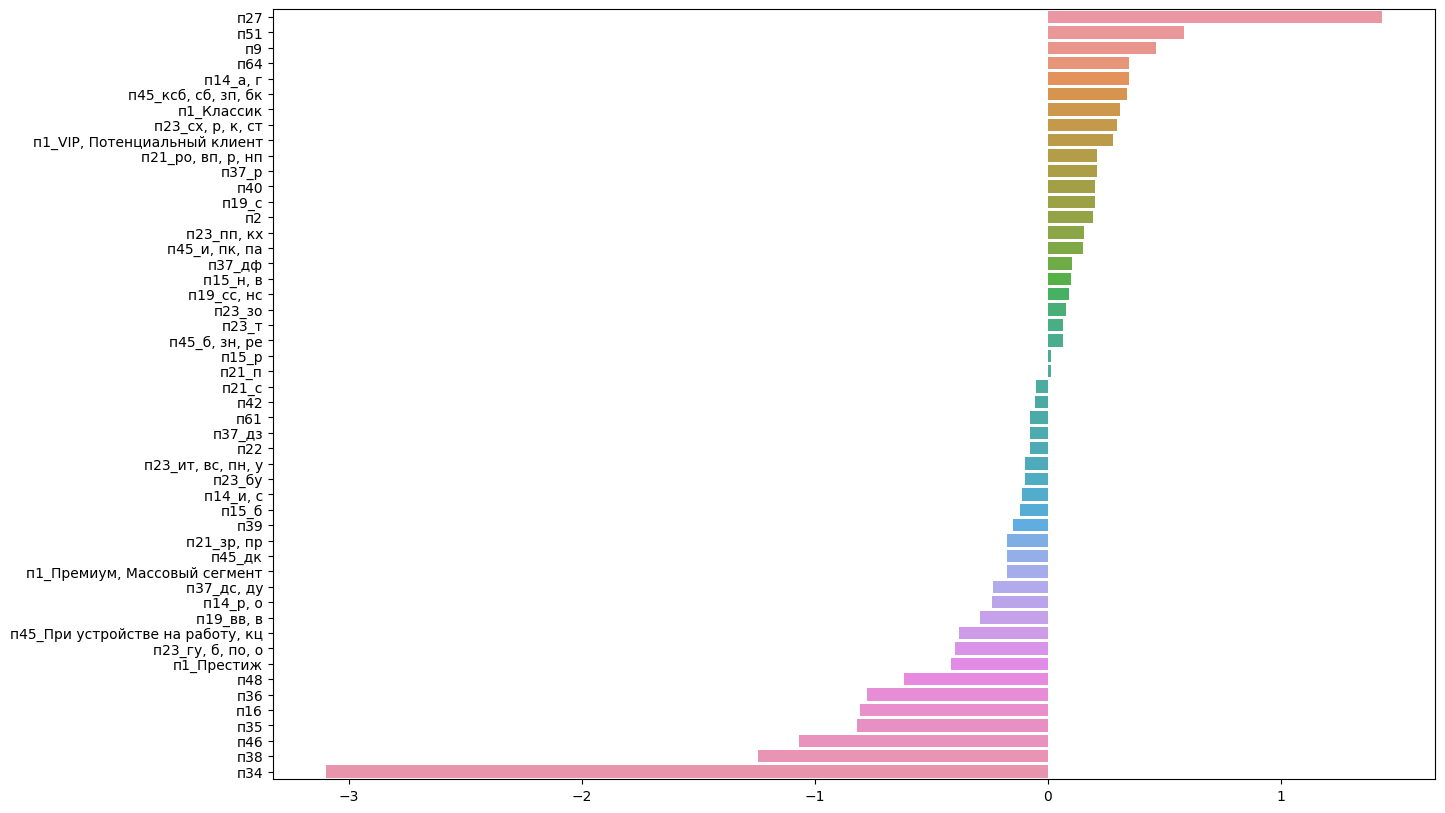

In [174]:
plt.subplots(figsize=(15, 10))
sns.barplot(x=koef.values, y=koef.index)

# roc_auc and roc_curve

In [175]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
roc_auc

0.7940415911800685

In [176]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

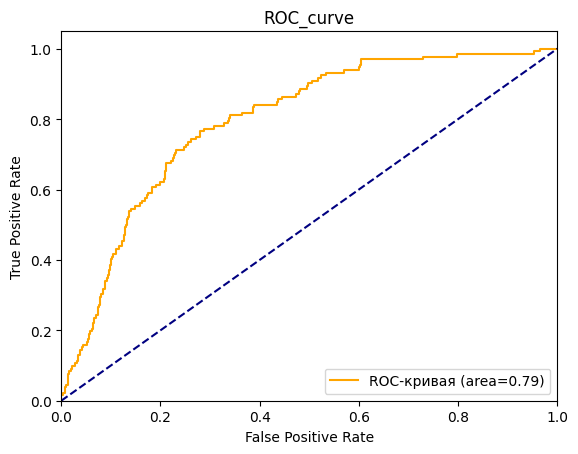

In [177]:
plt.plot(fpr, tpr, color='orange', label='ROC-кривая (area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc='lower right')
plt.show()

# key indicators plots

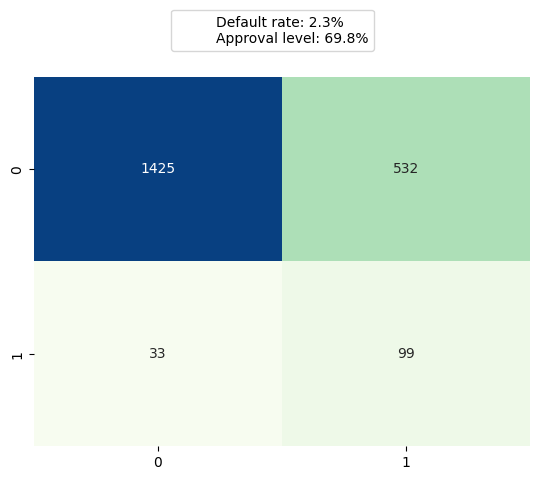

In [178]:
from matplotlib.patches import Rectangle
def_level = 100 * matrix[1,0]/(matrix[1,0]+matrix[0,0])
appr_lev = 100 * (matrix[0,0]+matrix[1,0])/len(y_test)
ax_m = sns.heatmap(matrix, annot=True, cbar=False, cmap='GnBu', fmt='.0f')
rect = Rectangle((0, 0), 0, 0, color=(1.0000, 1.0000, 1.0000))
ax_m.legend(handles=[rect], labels=[f'Default rate: {round(def_level,1)}%' '\n' f'Approval level: {round(appr_lev,1)}%'], bbox_to_anchor=(0.7, 1.2))

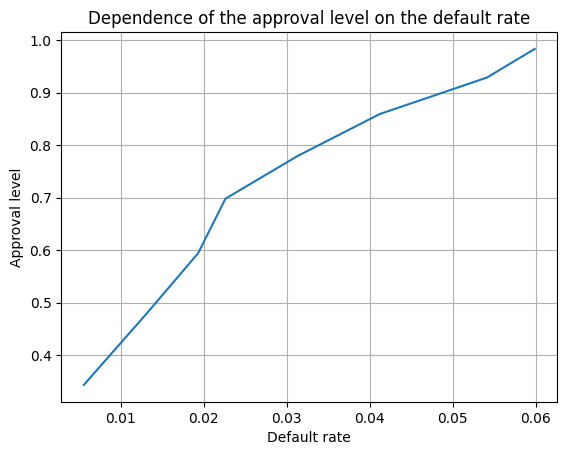

In [185]:
cut_off = np.arange(0.2, 1, 0.1)
def_array = []
appr_array = []
for i in cut_off:
    probs_test = model.predict_proba(X_test)[:,1]
    pred_cut = np.where(probs_test >= i, 1, 0)
    matr = confusion_matrix(y_test, pred_cut)
    df_new = pd.DataFrame({'fact': np.array(y_test), 'pred': pred_cut})
    yes_count = len(df_new[df_new['pred']==0])
    def_count = len(df_new[(df_new['pred']==0) & (df_new['fact']==1)])
    def_level = def_count/yes_count
    def_array.append(def_level)
    appr_level = (matr[1,0]+matr[0,0])/len(y_test)
    appr_array.append(appr_level)
    
plot_data = pd.DataFrame({'cut_off': cut_off, 'appr': appr_array, 'def_lev': def_array})
ax = sns.lineplot(plot_data, x='def_lev', y='appr')
plt.xlabel('Default rate')
plt.ylabel('Approval level')
plt.title('Dependence of the approval level on the default rate')
plt.grid(True)
plt.show()